In [25]:
import numpy as np 
from scipy import fftpack 
import pandas as pd
from matplotlib import pyplot as plt
import math 
from array import *

In [26]:
data =  pd.read_excel (r'F:\Data for US pulses\Two Pulses for water and castor oil at sample cell 10mm.xlsx')
print(data)

      Time  Distill water 10mm  Pure castor oil 10mm  Unnamed: 3      T    w  \
0     4.00                 0.0               0.00391         NaN   0.00  0.0   
1     4.01                 0.0               0.00391         NaN   0.01  0.0   
2     4.02                 0.0               0.00000         NaN   0.02  0.0   
3     4.03                 0.0               0.00000         NaN   0.03  0.0   
4     4.04                 0.0               0.01172         NaN   0.04  0.0   
5     4.05                 0.0               0.00000         NaN   0.05  0.0   
6     4.06                 0.0               0.00000         NaN   0.06  0.0   
7     4.07                 0.0               0.00000         NaN   0.07  0.0   
8     4.08                 0.0               0.00391         NaN   0.08  0.0   
9     4.09                 0.0               0.00000         NaN   0.09  0.0   
10    4.10                 0.0               0.00000         NaN   0.10  0.0   
11    4.11                 0.0          

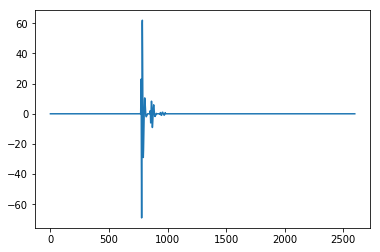

In [27]:
Before= data['w']
plt.plot(Before)
plt.show()

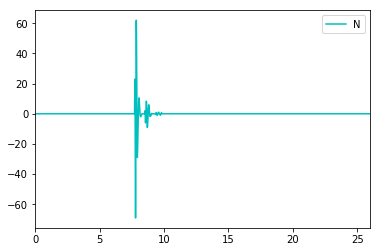

In [28]:
dt = 0.01
t = np.arange(0,26,dt)
f = Before
plt.plot(t,f,color='c',LineWidth=1.5,label='N')
plt.xlim(t[0],t[-1])
plt.legend()


[0.0000e+00 2.6000e+05 5.2000e+05 ... 6.7522e+08 6.7548e+08 6.7574e+08]


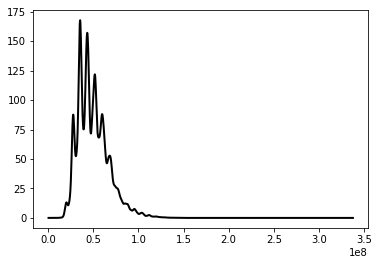

In [29]:
#Fast Fourier transform (FFT)
n = len(t)
fhat = np.fft.fft(f,n) #compute the FFT
PSD = fhat * np.conj(fhat)/n            #Power spectrum densoty
freq = (1/dt*n)*np.arange(n)
#freq = (1/dt)#creat x-axis of freq
freqq = (4,21,100)

L = np.arange(1,np.floor(n/2),dtype='int') 

print(freq)

plt.plot(freq[L],PSD[L],color='k',LineWidth=2,label='C')

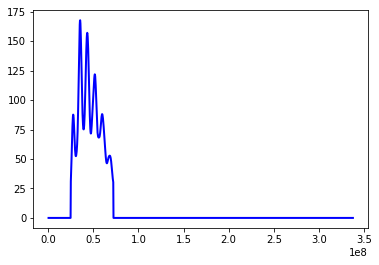

In [51]:
# By using PSD data, we can fillter out the noise 

indices = PSD>30
PSDclean = indices * PSD
fhat = indices*fhat
ifftt = np.fft.ifft(fhat)

plt.plot(freq[L],PSDclean[L],color='b',LineWidth=2,label='C')


plt.show()

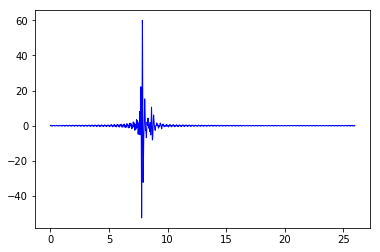

In [52]:
plt.plot(t,ifftt,color='b',LineWidth=1,label='C')

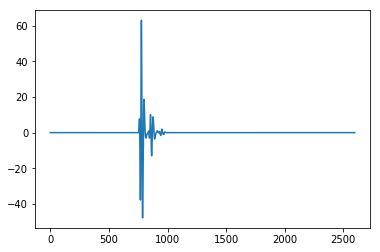

In [53]:
##Second pules
Second_P = data['c']
plt.plot(Second_P)
plt.show()


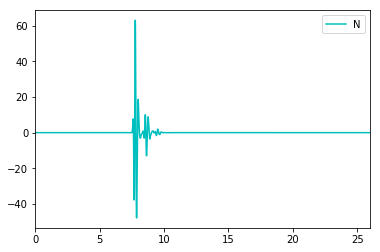

In [54]:
dt = 0.01
t = np.arange(0,26,dt)
f = Second_P
plt.plot(t,f,color='c',LineWidth=1.5,label='N')
plt.xlim(t[0],t[-1])
plt.legend()

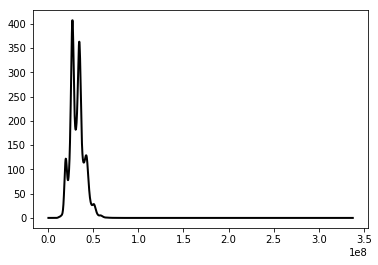

In [55]:
n = len(t)
fhat_Second = np.fft.fft(f,n) #compute the FFT
PSD_Second = fhat_Second * np.conj(fhat_Second)/n            #Power spectrum densoty
freq_Second = (1/dt*n)*np.arange(n)#creat x-axis of freq
Freq = (0,25,)
L = np.arange(1,np.floor(n/2),dtype='int')   
q = np.array(PSD_Second)
y = np.vectorize(PSD_Second)
plt.plot(freq_Second[L],PSD_Second[L],color='k',LineWidth=2,label='C')
print(y)

[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]


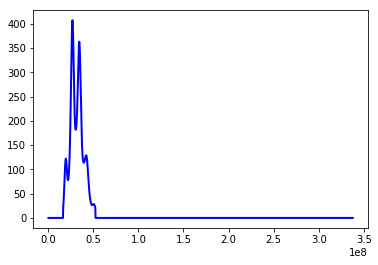

In [56]:
# By using PSD, we can fillter out the noise 

indices_Second = PSD_Second>20
PSDclean_Second = indices_Second * PSD_Second
fhat_Second = indices_Second*fhat_Second
ifftt_Second = np.fft.ifft(fhat_Second)

plt.plot(freq_Second[L],PSDclean_Second[L],color='b',LineWidth=2,label='C')

print(PSDclean_Second)


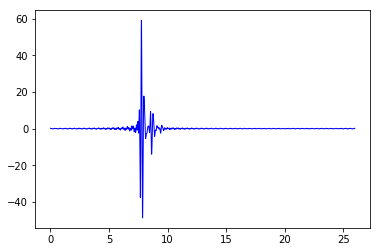

In [57]:
plt.plot(t,ifftt_Second,color='b',LineWidth=1,label='C')

In [92]:
alpha = 20*(np.log(PSDclean/PSDclean_Second))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in multiply
  """Entry point for launching an IPython kernel.


In [93]:
print(alpha)
print(freq_Second)

[nan+nanj nan+nanj nan+nanj ... nan+nanj nan+nanj nan+nanj]
[0.0000e+00 2.6000e+05 5.2000e+05 ... 6.7522e+08 6.7548e+08 6.7574e+08]


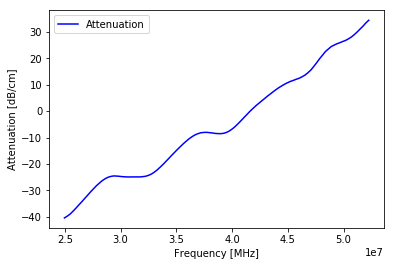

In [94]:
plt.plot(freq_Second[L],alpha[L],color='b',label='Attenuation')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Attenuation [dB/cm]')
plt.legend()
plt.show()

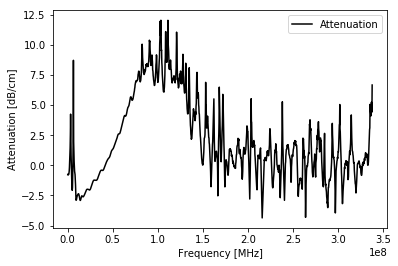

In [70]:
alpha2 = -(np.log((abs((PSD_Second/PSD)))))
plt.plot(freq_Second[L],alpha2[L],color='k',label='Attenuation')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Attenuation [dB/cm]')
plt.legend()
plt.show()